In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt

In [6]:

#  Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

In [7]:
# Optional: Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [10]:
# KNN class from scratch
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        # Compute distances to all training samples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get labels of k nearest neighbors
        k_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        counts = np.bincount(k_labels)
        return np.argmax(counts)


In [11]:
# Train and test the model
k = 5  # You can change K
knn = KNNClassifier(k=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
#  Evaluation
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



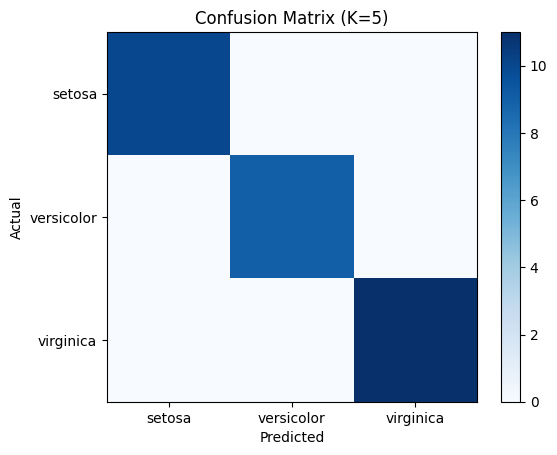

In [14]:
#  Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={k})")
plt.colorbar()
plt.xticks(np.arange(len(iris.target_names)), iris.target_names)
plt.yticks(np.arange(len(iris.target_names)), iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# Save predictions
np.save("predictions.npy", y_pred)

In [17]:
#Find best K using simple accuracy check
from sklearn.metrics import accuracy_score

accuracies = []
for k_try in range(1, 16):
    knn_try = KNNClassifier(k=k_try)
    knn_try.fit(X_train, y_train)
    y_pred_try = knn_try.predict(X_test)
    acc = accuracy_score(y_test, y_pred_try)
    accuracies.append(acc)

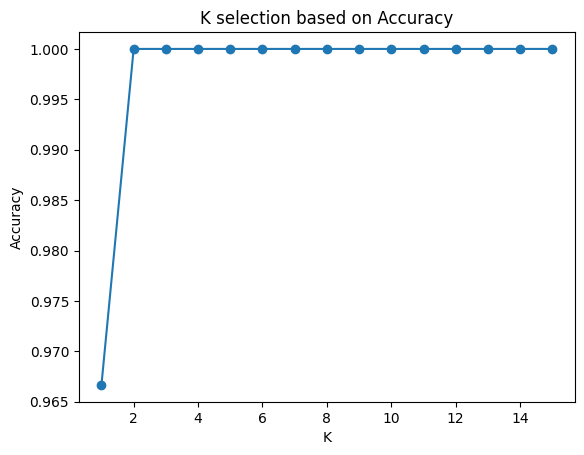

In [18]:
plt.plot(range(1, 16), accuracies, marker='o')
plt.title("K selection based on Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()